In [1]:
import pandas as pd
# !pip install pyarrow
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(font_scale=2., palette='tab20', font="Times New Roman") 

In [2]:
data = pd.read_parquet("../results/big_params_grid/45/ts_model-state.parquet")

In [3]:
data

,round,trial,p,w,M,l,b,Q,T,interest,loop_amp
0,0,0,1.0,0,4,1,0.0,0,2000,"[0.4890115134756001, 0.04954472684472544, -0.2...",0.000019
1,1,0,1.0,0,4,1,0.0,0,2000,"[0.4890115134756001, 0.04954472684472544, -0.2...",0.000021
2,2,0,1.0,0,4,1,0.0,0,2000,"[0.4890115134756001, 0.04954472684472544, -0.2...",0.000096
3,3,0,1.0,0,4,1,0.0,0,2000,"[0.4890115134756001, 0.04954472684472544, -0.2...",0.000107
4,4,0,1.0,0,4,1,0.0,0,2000,"[0.4890115134756001, 0.04954472684472544, -0.2...",0.000249
...,...,...,...,...,...,...,...,...,...,...,...
1759995,1995,3,1.0,0,100,100,1.0,0,2000,"[-0.004233232553757614, -0.00614536555533433, ...",7.623982
1759996,1996,3,1.0,0,100,100,1.0,0,2000,"[-0.012018547965314376, 0.00037577259666285966...",7.616116
1759997,1997,3,1.0,0,100,100,1.0,0,2000,"[-0.012544495298847142, -0.01699925417613974, ...",7.709344
1759998,1998,3,1.0,0,100,100,1.0,0,2000,"[-0.015418741722344882, -0.01806066856068297, ...",7.681773


In [4]:
data.describe()

,round,trial,p,w,M,l,b,Q,T,loop_amp
count,1.760000e+06,1.760000e+06,1760000.0,1760000.0,1.760000e+06,1.760000e+06,1.760000e+06,1760000.0,1760000.0,1.760000e+06
mean,9.995000e+02,1.500000e+00,1.0,0.0,6.065000e+01,2.325000e+01,5.000000e-01,0.0,2000.0,4.802275e+01
std,5.773504e+02,1.118034e+00,0.0,0.0,3.527645e+01,3.035108e+01,3.162279e-01,0.0,0.0,2.241306e+02
min,0.000000e+00,0.000000e+00,1.0,0.0,4.000000e+00,1.000000e+00,0.000000e+00,0.0,2000.0,2.763302e-09
25%,4.997500e+02,7.500000e-01,1.0,0.0,4.000000e+01,3.250000e+00,2.000000e-01,0.0,2000.0,7.547652e-02
50%,9.995000e+02,1.500000e+00,1.0,0.0,7.500000e+01,7.000000e+00,5.000000e-01,0.0,2000.0,7.151769e-01
75%,1.499250e+03,2.250000e+00,1.0,0.0,1.000000e+02,5.000000e+01,8.000000e-01,0.0,2000.0,6.064052e+00
max,1.999000e+03,3.000000e+00,1.0,0.0,1.000000e+02,1.000000e+02,1.000000e+00,0.0,2000.0,4.704711e+03


In [5]:
data['max_interest'] = data['interest'].apply(max)

In [6]:
import numpy as np
from scipy import interpolate

In [7]:
# X = data['M']
# Y = data['l']
# Z = data['max_interest']
# color = data['b']

# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(projection='3d')

# ax.scatter(Y, X, Z, c=color)
# ax.set_xlabel("M")
# ax.set_ylabel("l")
# ax.set_zlabel("max interest")

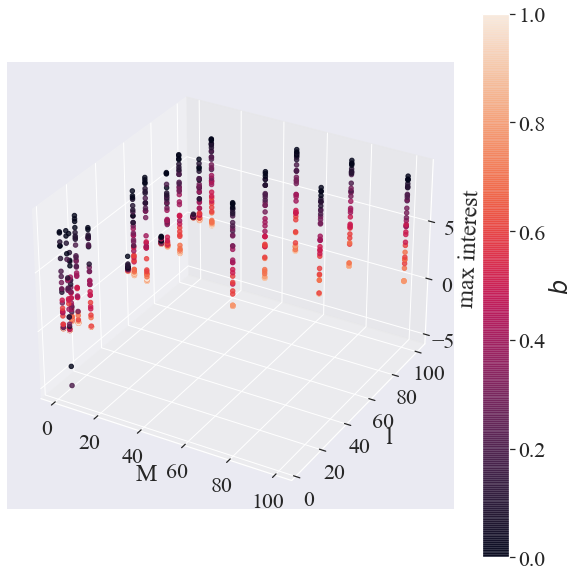

In [8]:
data_1999 = data[data['round'] == 1999]

X = data_1999['M']
Y = data_1999['l']
Z = data_1999['max_interest']
color = data_1999['b']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
plt.xlabel('M')
plt.ylabel('l')
p = ax.scatter(Y, X, Z, c=color,alpha=0.8)

cbar = fig.colorbar(p, ax=ax)
cbar.set_label(r'$b$')

ax.set_xlabel("M")
ax.set_ylabel("l")
ax.set_zlabel("max interest")
plt.savefig('../figures/3d_var_wp_max_interest.pdf');

In [9]:
data_1999

,round,trial,p,w,M,l,b,Q,T,interest,loop_amp,max_interest
1999,1999,0,1.0,0,4,1,0.0,0,2000,"[8.166612539869503, 0.02751843264873577, -0.25...",58.948457,8.166613
3999,1999,1,1.0,0,4,1,0.0,0,2000,"[6.992420567509349, 0.08855119651739377, -0.23...",45.008096,6.992421
5999,1999,2,1.0,0,4,1,0.0,0,2000,"[-0.4422877302754506, 7.000250333652132, 0.320...",42.597325,7.000250
7999,1999,3,1.0,0,4,1,0.0,0,2000,"[-0.508278656656707, 8.073444112044571, -0.195...",59.012685,8.073444
9999,1999,0,1.0,0,4,4,0.0,0,2000,"[-7.207151244186001, -6.332198474540911, 7.386...",192.072397,7.978672
...,...,...,...,...,...,...,...,...,...,...,...,...
1751999,1999,3,1.0,0,100,75,1.0,0,2000,"[0.05151455629516866, 0.00949754443851002, 0.0...",5.268899,0.051515
1753999,1999,0,1.0,0,100,100,1.0,0,2000,"[0.04768477537939061, 0.011499638195259544, 0....",7.394610,0.057049
1755999,1999,1,1.0,0,100,100,1.0,0,2000,"[-0.00651946157306854, 0.017743459615284812, -...",9.299939,0.066651
1757999,1999,2,1.0,0,100,100,1.0,0,2000,"[-0.03590373699013552, 0.005340006201577671, 0...",8.961645,0.064995


In [10]:
fig = plt.figure(figsize=(25,30), dpi=400)


data_1999 = data.where(data['round'] == 1999)

clims = -1, data_1999['max_interest'].max() 
# clims = data_1999['max_interest'].min(), data_1999['max_interest'].max() 

for i, b in enumerate([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):
    plt.subplot(4,3,i+1)
    cols = ['M', 'l', 'max_interest']
    cur_b  = data_1999[data_1999['b'] == b]
    xyz = cur_b[cols].groupby(['M','l']).mean(['max_interest'])
    xyz = xyz.reset_index()
    xyz.columns =  ['M', 'l', 'max_interest']
    xyz = xyz.pivot('M', 'l')

    X=xyz.columns.levels[1].values
    Y=xyz.index.values
    Z=xyz.values
    Xi,Yi = np.meshgrid(X, Y)
    plt.xlabel('l')
    plt.ylabel('M')
    ax = plt.contourf(Xi, Yi, Z, 10, alpha=0.7, cmap=plt.cm.jet)
    plt.clim(*clims)

    cbar = fig.colorbar(ax)
    cbar.set_label(r'$\max \mu_t$')
    plt.title(f'b = {b}')
    plt.tight_layout()
    
plt.savefig('../figures/countour_big_Mlb.pdf');

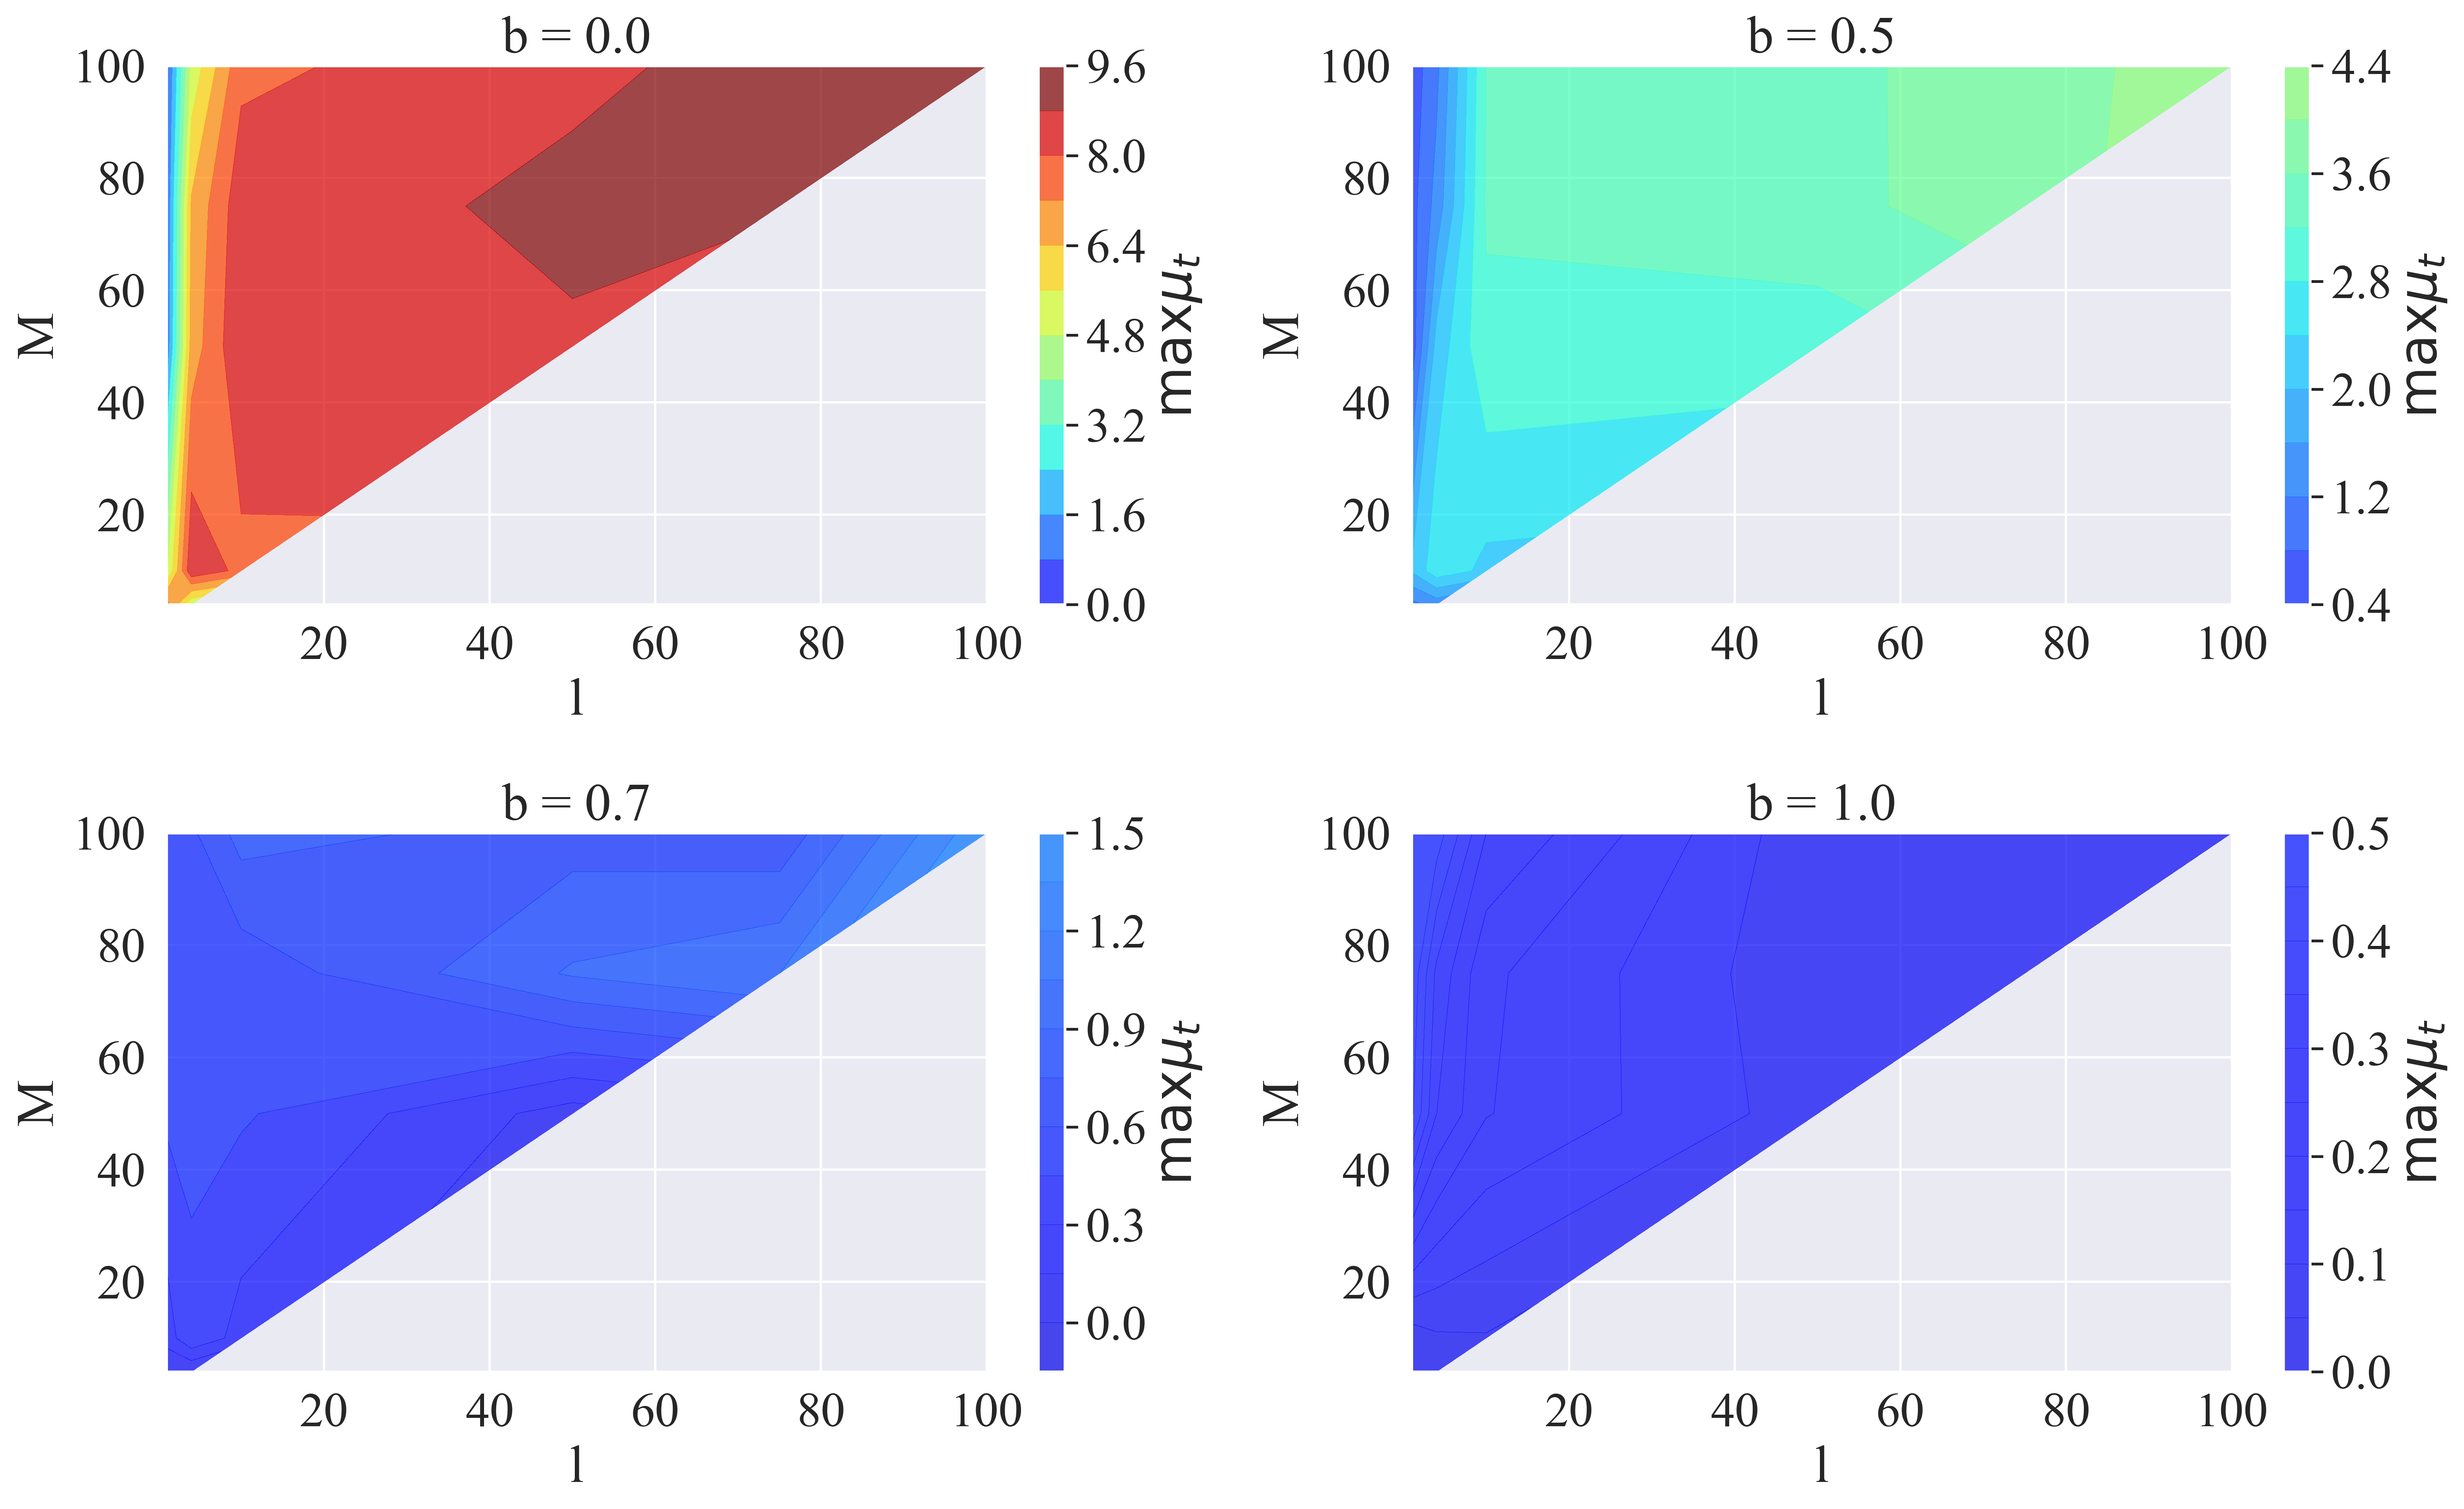

In [11]:
fig = plt.figure(figsize=(16,10), dpi=400)


data_1999 = data.where(data['round'] == 1999)

clims = -1, data_1999['max_interest'].max() 
# clims = data_1999['max_interest'].min(), data_1999['max_interest'].max() 

for i, b in enumerate([0.0, 0.5,0.7,1.0]):
    plt.subplot(2,2,i+1)
    cols = ['M', 'l', 'max_interest']
    cur_b  = data_1999[data_1999['b'] == b]
    xyz = cur_b[cols].groupby(['M','l']).mean(['max_interest'])
    xyz = xyz.reset_index()
    xyz.columns =  ['M', 'l', 'max_interest']
    xyz = xyz.pivot('M', 'l')

    X=xyz.columns.levels[1].values
    Y=xyz.index.values
    Z=xyz.values
    Xi,Yi = np.meshgrid(X, Y)
    plt.xlabel('l')
    plt.ylabel('M')
    ax = plt.contourf(Xi, Yi, Z, 10, alpha=0.7, cmap=plt.cm.jet)
    plt.clim(*clims)

    cbar = fig.colorbar(ax)
    cbar.set_label(r'$\max \mu_t$')
    plt.title(f'b = {b}')
    plt.tight_layout()
    
plt.savefig('../figures/countour_big_Mlb_part.pdf');